In [1]:
#Richter's Predictor: Modeling Earthquake Damage
#https://www.drivendata.org/competitions/57/nepal-earthquake/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from string import ascii_letters
%matplotlib inline

In [2]:
# read the file into dataframe
df_labels = pd.read_csv('train_labels.csv')
df_features = pd.read_csv('train_values.csv')

In [3]:
#Checking the shapes of dataset
print ('Labels dataframe shape:', df_labels.shape)
print ('Features dataframe shape:', df_features.shape)

Labels dataframe shape: (260601, 2)
Features dataframe shape: (260601, 39)


In [4]:
#checking the dataframes 
df_features.tail(10)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
260591,560805,20,368,5980,1,25,5,3,n,r,...,1,0,0,0,0,0,0,0,0,0
260592,207683,10,1382,1903,2,25,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260593,226421,8,767,8613,2,5,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
260594,159555,27,181,1537,6,0,13,12,t,r,...,0,0,0,0,0,0,0,0,0,0
260595,827012,8,268,4718,2,20,8,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,0
260600,747594,21,9,9101,3,10,7,6,n,r,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#checking the dataframes 
df_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [6]:
print (df_features.has_secondary_use.value_counts())
print (df_features.has_secondary_use_agriculture.value_counts())
print (df_features.has_secondary_use_hotel.value_counts())                    
print (df_features.has_secondary_use_rental.value_counts())                   
print (df_features.has_secondary_use_institution.value_counts())             
print (df_features.has_secondary_use_school.value_counts())                   
print (df_features.has_secondary_use_industry.value_counts())                 
print (df_features.has_secondary_use_health_post.value_counts())              
print (df_features.has_secondary_use_gov_office.value_counts())               
print (df_features.has_secondary_use_use_police.value_counts())               
print (df_features.has_secondary_use_other.value_counts())                    

0    231445
1     29156
Name: has_secondary_use, dtype: int64
0    243824
1     16777
Name: has_secondary_use_agriculture, dtype: int64
0    251838
1      8763
Name: has_secondary_use_hotel, dtype: int64
0    258490
1      2111
Name: has_secondary_use_rental, dtype: int64
0    260356
1       245
Name: has_secondary_use_institution, dtype: int64
0    260507
1        94
Name: has_secondary_use_school, dtype: int64
0    260322
1       279
Name: has_secondary_use_industry, dtype: int64
0    260552
1        49
Name: has_secondary_use_health_post, dtype: int64
0    260563
1        38
Name: has_secondary_use_gov_office, dtype: int64
0    260578
1        23
Name: has_secondary_use_use_police, dtype: int64
0    259267
1      1334
Name: has_secondary_use_other, dtype: int64


In [7]:
sum = 1334 + 23 + 38 + 49 +279 +94 +245 +2111 + 8763 + 16777 
sum

29713

In [8]:
df_features.shape

(260601, 39)

In [9]:
df_features.count_floors_pre_eq.value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

In [10]:
#checking the type of data
print (df_features.dtypes)
print ('\r')
print (df_features.dtypes.value_counts())

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [11]:
#checking the type of data
print (df_labels.dtypes)
print ('\r')
print (df_labels.dtypes.value_counts())

building_id     int64
damage_grade    int64
dtype: object

int64    2
dtype: int64


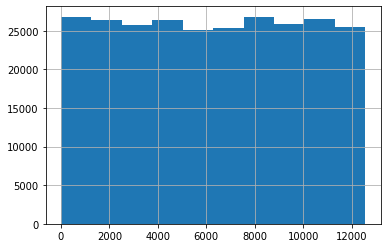

In [12]:
df_features.geo_level_3_id.hist()


In [13]:
#Combining the two dataframes into one just to try out concat , and also maybe easier for plots

#Dropping building_id from df_lables since this is common to both
df_labels.drop(columns=['building_id'],inplace=True)

#Concat the two Data frames
df_combined = pd.concat([df_labels,df_features], axis=1)

In [14]:
#Checking the new dataframe 
df_combined.head()

,damage_grade,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,3,802906,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,2,28830,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,3,94947,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,2,590882,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,3,201944,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# set the building ID as index 
df_combined.set_index(['building_id'], inplace=True)

In [16]:
#check the change took effect
df_combined.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
28830,2,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
94947,3,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
590882,2,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
201944,3,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# checking the shape we have 1 lable column and 38 features 
df_combined.shape

(260601, 39)

In [18]:
# checking for null and na 
print ( df_combined.isna().sum())
print ('\r')
print (df_combined.isna().sum())

damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

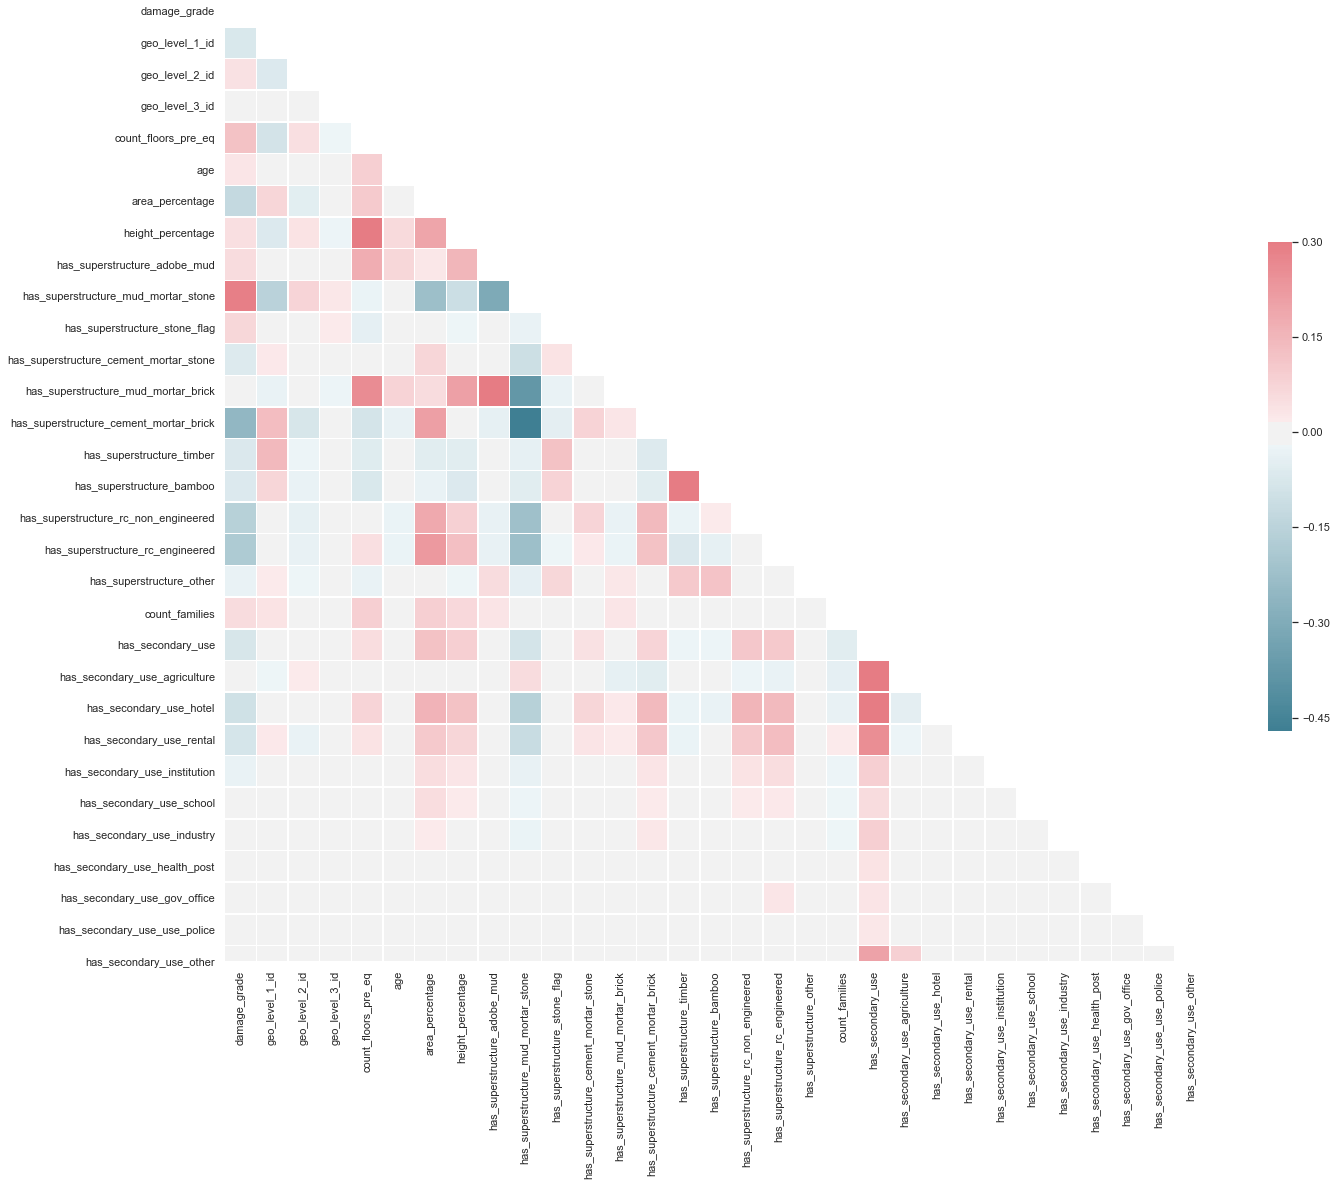

In [19]:
#looking at Corr matrix 
sns.set(style="white")

# Compute the correlation matrix
corr = df_combined.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

damage_grade as pie chart:


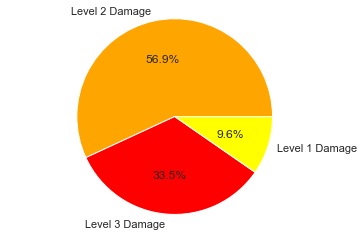

Seems to be imbalanced classes of ordinal target data, may need to consider SMOTE or Straify option


In [20]:
# Checking Damage Grade in the dataset
print("damage_grade as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df_combined.damage_grade.value_counts(),autopct='%1.1f%%', labels=['Level 2 Damage','Level 3 Damage', 'Level 1 Damage'], 
       colors=['orange','red','yellow'])
plt.axis('equal')
plt.title='percenatge of Buildings'
plt.show()
print ('Seems to be imbalanced classes of ordinal target data, may need to consider SMOTE or Straify option')

In [21]:
df_combined.damage_grade.value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

count    260601.000000
mean         26.535029
std          73.565937
min           0.000000
25%          10.000000
50%          15.000000
75%          30.000000
max         995.000000
Name: age, dtype: float64


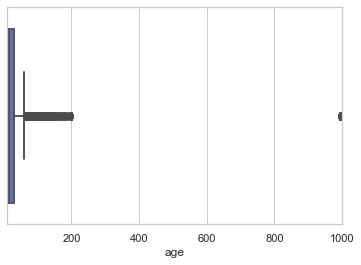

In [22]:
#checking the Age values 
print(df_combined.age.describe())

sns.set(style="whitegrid")
ax = sns.boxplot(x=df_combined["age"])
ax.set(xlim=(10, 1000))
sns.boxplot(x="age", data=df_combined)

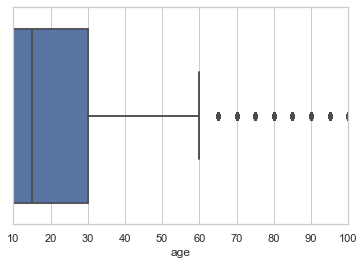

In [23]:
ax = sns.boxplot(x=df_combined["age"])
ax.set(xlim=(10, 100))
sns.boxplot(x="age", data=df_combined)

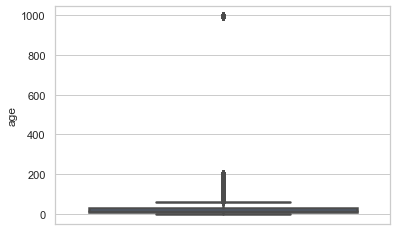

In [24]:
 sns.boxplot(y="age",
                 data=df_combined, linewidth=2.5)

In [25]:
df_combined.age.value_counts().

SyntaxError: invalid syntax (<ipython-input-25-034306246089>, line 1)

In [26]:
#Calculate Mean age we will replace outliers and 0 age with this value
mean_building_age =df_combined.age.mean()

In [27]:
# change 0 and >200 to mean age
df_combined.loc[(df_combined.age == 0 ),'age']= mean_building_age
df_combined.loc[(df_combined.age > 200 ),'age']= mean_building_age

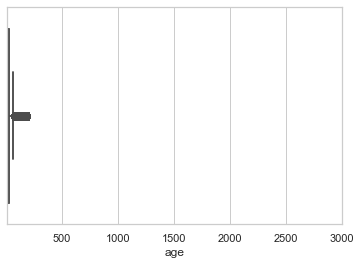

In [28]:
ax = sns.boxplot(x=df_combined["age"])
ax.set(xlim=(10, 3000))
sns.boxplot(x="age", data=df_combined)

In [29]:
#Droping some features initially based on Corr matrix,
#df_col.drop(columns=['has_secondary_use'],inplace=True)
df_combined.drop(columns=['has_secondary_use_agriculture',
                          'has_secondary_use_hotel',
                         'has_secondary_use_rental',
                         'has_secondary_use_institution',
                         'has_secondary_use_school',
                         'has_secondary_use_industry',
                          'has_secondary_use_health_post',
                          'has_secondary_use_gov_office',
                          'has_secondary_use_use_police',
                           'has_secondary_use_other'],inplace=True)
df_combined.shape

(260601, 29)

In [30]:
df_combined.drop(columns=['has_secondary_use'],inplace=True)

In [31]:
# Converting Catergorical variables
# using Categorical boolean mask
categorical_feature_mask = df_combined.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df_combined.columns[categorical_feature_mask].tolist()
categorical_cols

['land_surface_condition',
 'foundation_type',
 'roof_type',
 'ground_floor_type',
 'other_floor_type',
 'position',
 'plan_configuration',
 'legal_ownership_status']

In [32]:
#df_col.drop(columns=['legal_ownership_status'],inplace=True)

In [33]:
for feature in categorical_cols:
    
    df_combined = pd.concat([df_combined,pd.get_dummies(df_combined[feature], prefix='ohe')],axis=1)

    # now drop the original cayerhprocal features columns (you don't need it anymore)
    df_combined.drop([feature],axis=1, inplace=True)


In [34]:
df_combined.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,ohe_m,ohe_n,ohe_o,ohe_q,ohe_s,ohe_u,ohe_a,ohe_r,ohe_v,ohe_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30.0,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
28830,2,8,900,2812,2,10.0,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
94947,3,21,363,8973,2,10.0,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
590882,2,22,418,10694,2,10.0,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
201944,3,11,131,1488,3,30.0,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 58 columns):
damage_grade                              260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null float64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
has_superstructure_adobe_mud              260601 non-null int64
has_superstructure_mud_mortar_stone       260601 non-null int64
has_superstructure_stone_flag             260601 non-null int64
has_superstructure_cement_mortar_stone    260601 non-null int64
has_superstructure_mud_mortar_brick       260601 non-null int64
has_superstructure_cement_mortar_brick    260601 n

In [36]:
df_combined.describe()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,ohe_m,ohe_n,ohe_o,ohe_q,ohe_s,ohe_u,ohe_a,ohe_r,ohe_v,ohe_w
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,2.238272,13.900353,701.074685,6257.876148,2.129723,24.020965,8.018051,5.434365,0.088645,0.761935,...,0.000177,0.000146,0.000610,0.021842,0.001328,0.014002,0.021151,0.005652,0.962924,0.010272
std,0.611814,8.033617,412.710734,3646.369645,0.727665,18.235232,4.392231,1.918418,0.284231,0.425900,...,0.013285,0.012075,0.024693,0.146167,0.036413,0.117500,0.143888,0.074969,0.188948,0.100831
min,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,12.000000,702.000000,6270.000000,2.000000,20.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.000000,30.000000,1427.000000,12567.000000,9.000000,200.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
y= df_combined.damage_grade
X= df_combined.drop(columns=['damage_grade'])
X.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,ohe_m,ohe_n,ohe_o,ohe_q,ohe_s,ohe_u,ohe_a,ohe_r,ohe_v,ohe_w
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30.0,6,5,1,1,0,...,0,0,0,0,0,0,0,0,1,0
28830,8,900,2812,2,10.0,8,7,0,1,0,...,0,0,0,0,0,0,0,0,1,0
94947,21,363,8973,2,10.0,5,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
590882,22,418,10694,2,10.0,6,5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
201944,11,131,1488,3,30.0,8,9,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
y.head()

building_id
802906    3
28830     2
94947     3
590882    2
201944    3
Name: damage_grade, dtype: int64

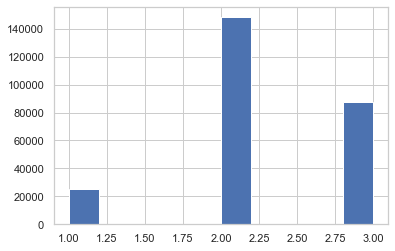

In [39]:
y.hist()

In [58]:
import imblearn

AttributeError: module 'keras.backend.tensorflow_backend' has no attribute '_is_tf_1'

In [59]:
def makeOverSamplesSMOTE(X,y):
 #input DataFrame
 #X →Independent Variable in DataFrame\
 #y →dependent Variable in Pandas DataFrame format
 from imblearn.over_sampling import SMOTE
 sm = SMOTE()
 X, y = sm.fit_sample(X, y)
 return X,y


def makeOverSamplesADASYN(X,y):
 #input DataFrame
 #X →Independent Variable in DataFrame\
 #y →dependent Variable in Pandas DataFrame format
 from imblearn.over_sampling import ADASYN 
 sm = ADASYN()
 X, y = sm.fit_sample(X, y)
 return(X,y)


X,y = makeOverSamplesSMOTE(X,y)
#X,y= makeOverSamplesADASYN(X,y)


KeyError: 'Only the Series name can be used for the key in Series dtype mappings.'

In [42]:
#checking the balance, converting smote output to df to view it
y_res = pd.DataFrame(data=y, columns=['damage_grade'])

In [43]:
y_res.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


damage_grade as pie chart:


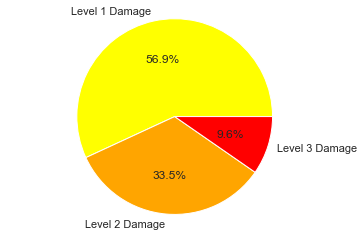

Seems to be imbalanced classes of ordinal target data, may need to consider SMOTE or Straify option


In [44]:
# Checking Damage Grade in the dataset
print("damage_grade as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(y_res.damage_grade.value_counts(),autopct='%1.1f%%', labels=['Level 1 Damage','Level 2 Damage', 'Level 3 Damage'], 
       colors=['yellow','orange','red'])
plt.axis('equal')
plt.title='percenatge of Buildings'
plt.show()
print ('Seems to be imbalanced classes of ordinal target data, may need to consider SMOTE or Straify option')

In [45]:
y_res.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


In [46]:
# Split and Scale/Process data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0 )


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODEL 1 MLPClassifer

In [122]:
#MODEL 1  MLPClassifier 
from sklearn.neural_network import MLPClassifier

# BUILD MODEL 
#model = MLPClassifier(early_stopping=True, activation='relu', hidden_layer_sizes=500, learning_rate='adaptive' )

model = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

# Fit Model
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

#metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

from sklearn.metrics import f1_score
print (f1_score(y_test, y_pred, average='micro'))


#from sklearn.metrics import balanced_accuracy_score
#print(balanced_accuracy_score(y_test, y_pred))


F:\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           1       0.54      0.40      0.46      7457
           2       0.69      0.79      0.73     44423
           3       0.65      0.54      0.59     26301

    accuracy                           0.67     78181
   macro avg       0.63      0.58      0.59     78181
weighted avg       0.66      0.67      0.66     78181

[[ 2983  4125   349]
 [ 2234 35012  7177]
 [  293 11846 14162]]
0.6671314002123278


In [50]:
model.classes_

array([1, 2, 3], dtype=int64)

# MODEL 3 Logistic Regression

In [123]:
# MODEL 2 logistic Regression using Multi_class Parameter
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, multi_class='multinomial',n_jobs=4 , solver='newton-cg' ).fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

#metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from matplotlib import pyplot as plt

report = classification_report(y_test, y_pred)
print(report)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')


              precision    recall  f1-score   support

           1       0.57      0.30      0.39      7457
           2       0.60      0.87      0.71     44423
           3       0.55      0.20      0.29     26301

    accuracy                           0.59     78181
   macro avg       0.57      0.46      0.46     78181
weighted avg       0.58      0.59      0.54     78181

[[ 2249  5011   197]
 [ 1581 38805  4037]
 [  139 21020  5142]]


0.5908852534503268

# MODEL 4 Ridge Classifier 

In [42]:
from sklearn.linear_model import RidgeClassifier

#model and fit
clf = RidgeClassifier(alpha=1).fit(X_train_scaled, y_train)
y_pred=clf.predict(X_test_scaled)


#metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from matplotlib import pyplot as plt

report = classification_report(y_test, y_pred)
print(report)

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')


              precision    recall  f1-score   support

           1       0.76      0.71      0.74     44061
           2       0.49      0.33      0.40     44686
           3       0.52      0.71      0.60     44687

    accuracy                           0.59    133434
   macro avg       0.59      0.59      0.58    133434
weighted avg       0.59      0.59      0.58    133434

[[31406  4899  7756]
 [ 7864 14862 21960]
 [ 2115 10646 31926]]


0.5860125605168098

F:\conda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\conda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\conda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

           1       0.57      0.25      0.34      7457
           2       0.58      0.96      0.72     44423
           3       0.59      0.03      0.06     26301

    accuracy                           0.58     78181
   macro avg       0.58      0.41      0.38     78181
weighted avg       0.58      0.58      0.46     78181

[[ 1835  5581    41]
 [ 1289 42569   565]
 [   70 25354   877]]


0.5791816425985853

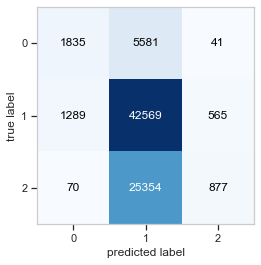

In [52]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(SVC()).fit(X_train_scaled, y_train)
y_pred= clf.predict(X_test_scaled)


#metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

plot_confusion_matrix(confusion_matrix(y_test, y_pred))

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [54]:
from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, max_depth=50)
# Fit on training data
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]
#Import scikit-learn metrics module for accuracy calculation
#metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

              precision    recall  f1-score   support

           1       0.64      0.47      0.54      7457
           2       0.72      0.82      0.77     44423
           3       0.71      0.59      0.65     26301

    accuracy                           0.71     78181
   macro avg       0.69      0.63      0.65     78181
weighted avg       0.71      0.71      0.70     78181

[[ 3505  3776   176]
 [ 1788 36568  6067]
 [  188 10587 15526]]


0.7111574423453269